In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Data Preparation
We have the dataset from the analytics program manager for research. We load it in the next cell

In [2]:
#We load the table from our file
sample_table = pd.read_csv("CY 2011-2016 Separations for STUDENTS - Sheet.csv")
sample_table.dropna()

,Empl Id,Empl Rcd No,Appt Type Desc,Empl Status,Effective Date,Action Reason Desc,Job Code,Job Code Desc,Org Node Code,Org Node Descr,Control Unit Code,Control Unit Desc,Division Code,Division Desc,Hire Dt,Annual Pay Rt,Fte,Ethnic Group Desc,Sex Cd,Birthdate
0,2277,0,2 - Regular/Career,T,11/01/16 12:00 AM,TER - Retirement-Voluntary-Staff,0657U,Business Systems Analyst 4,SXSIS,Student Information Systems,CAMSU,Campus Support,VCUGA,Student Affairs,12/13/1993,"$119,833.00",1.00,Wh,F,02/25/1953
1,6403,0,2 - Regular/Career,T,06/27/14 12:00 AM,TER - Retirement-Voluntary-Staff,6759C,Library Asst IV,KPADM,Library Administration,OACAD,Other Academic,UCLIB,UC Library,09/25/1973,"$55,872.00",1.00,As,F,02/12/1949
2,5061,0,2 - Regular/Career,T,06/27/13 12:00 AM,TER - Retirement-Voluntary-Staff,4136U,Recreation Supervisor 1,FOREC,Recreational Sports,CAMSU,Campus Support,VCBAS,Administration & Finance,01/13/1977,"$44,517.00",1.00,As,F,02/01/1956
3,10871,0,2 - Regular/Career,T,06/29/11 12:00 AM,TER - Retirement-Voluntary-Staff,8255C,"Stationary Engineer,Leadworker",UKHDS,Housing & Dining Services,CAMSU,Campus Support,VCUGA,Student Affairs,11/02/1981,"$65,918.00",1.00,As,M,03/15/1948
4,13633,0,6 - Per Diem,D,02/22/11 12:00 AM,TER - Death,0585U,Physician 5,FYUHS,University Health Services,CAMSU,Campus Support,VCBAS,Administration & Finance,11/01/1972,"$146,160.00",0.01,Wh,M,05/08/1932
5,13633,1,6 - Per Diem,T,02/22/11 12:00 AM,TER - End Additional Job,0585U,Physician 5,FYUHS,University Health Services,CAMSU,Campus Support,VCBAS,Administration & Finance,04/01/1997,"$1,200.00",0.00,Wh,M,05/08/1932
6,10485,0,2 - Regular/Career,T,06/29/16 12:00 AM,TER - Retirement-Voluntary-Staff,6292U,Events Specialist 3,FNATH,Intercollegiate Athletics,CAMSU,Campus Support,ATHLE,Athletics,01/26/1981,"$49,952.00",1.00,Wh,F,08/19/1957
7,3508,0,2 - Regular/Career,T,08/15/11 12:00 AM,TER - Resign-No Reason Given,8253C,"Engineer, Stationary",FJPPS,Facilities Services,CAMSU,Campus Support,VCCPD,Real Estate,05/14/1981,"$61,387.00",1.00,Wh,M,03/22/1957
8,7695,0,2 - Regular/Career,T,06/27/14 12:00 AM,TER - Retirement-Voluntary-Staff,4510U,Admissions/Recruitment Spec 4,CQADM,SPH Administration,SCHOL,Schools,SC1PH,School of Public Health,09/01/1981,"$58,721.00",1.00,Hisp,F,03/19/1955
9,7695,0,3 - Limited,T,04/30/15 12:00 AM,TER - Appt/Contract Expired,4510U,Admissions/Recruitment Spec 4,CQADM,SPH Administration,SCHOL,Schools,SC1PH,School of Public Health,09/01/1981,"$60,000.00",0.03,Hisp,F,03/19/1955


From Indu we know that there are some errors in Control Unit: "College of Letters & Science" to "Letters & Science"; "Exec Vice Chanc & Provost" to "Schools", "VC Administration & Finance", "VC Facilities Services" and "VC University Relations" to "Campus Support".

In [3]:
#There are several categories of control units that we have identified with the manager that they are mistaken. So we correct it here.
cu_change = list(sample_table["Control Unit Desc"])
for i in range(0,len(cu_change)):
    if cu_change[i] == "College of Letters & Science":
        cu_change[i] = "Letters & Science"
    elif cu_change[i] == 'Exec Vice Chanc & Provost':
        cu_change[i] = "Schools"
    elif cu_change[i] == "VC Administration & Finance" or cu_change[i] == "VC Facilities Services" or cu_change[i] == "VC University Relations":
        cu_change[i] = "Campus Support"
sample_table["Control Unit Desc"] = cu_change
sample_table.groupby("Control Unit Desc").count()

,Empl Id,Empl Rcd No,Appt Type Desc,Empl Status,Effective Date,Action Reason Desc,Job Code,Job Code Desc,Org Node Code,Org Node Descr,Control Unit Code,Division Code,Division Desc,Hire Dt,Annual Pay Rt,Fte,Ethnic Group Desc,Sex Cd,Birthdate
Control Unit Desc,,,,,,,,,,,,,,,,,,,
Campus Support,11199,11199,11199,11199,11199,11199,11199,11199,11199,11199,11199,11199,11199,11198,11199,11199,11093,11199,11199
Central Ledger,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68
Colleges,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1427,1440,1440
Letters & Science,1472,1472,1472,1472,1472,1472,1472,1472,1472,1472,1472,1472,1472,1472,1472,1472,1461,1472,1472
Other Academic,893,893,893,893,893,893,893,893,893,893,893,893,893,893,893,893,886,893,893
"Research, Policy, Planng & Adm",1409,1409,1409,1409,1409,1409,1409,1409,1409,1409,1409,1409,1409,1409,1409,1409,1407,1408,1409
Schools,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2136,2148,2148
VP Agriculture& Natural Resour,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57


We extract all the tables that measure the count of termination of each control units in different years. Since annually there are two reports in both April and October. We calculated the average of the counts in each year as that year's statistics. After that, we concatenate them together and call it control_unit_table.

In [4]:
#import all the data from Cal Answers for different control units and calculate each years' data based on the average of the reports on April
# and on October. The control units are Level 2 Data from Cal Answers
April_2011 = pd.read_csv("2011April.csv")
April_2011["Head Count"] = April_2011["Head Count"].apply(lambda x: int(x.replace(",", "")) if any(","in s for s in x) else int(x))
Oct_2011 = pd.read_csv("2011Oct.csv")
Oct_2011["Head Count"] = Oct_2011["Head Count"].apply(lambda x: int(x.replace(",", "")) if any(","in s for s in x) else int(x))
April_2012 = pd.read_csv("2012April.csv")
April_2012["Head Count"] = April_2012["Head Count"].apply(lambda x: int(x.replace(",", "")) if any(","in s for s in x) else int(x))
Oct_2012 = pd.read_csv("2012Oct.csv")
Oct_2012["Head Count"] = Oct_2012["Head Count"].apply(lambda x: int(x.replace(",", "")) if any(","in s for s in x) else int(x))
April_2013 = pd.read_csv("2013April.csv")
April_2013["Head Count"] = April_2013["Head Count"].apply(lambda x: int(x.replace(",", "")) if any(","in s for s in x) else int(x))
Oct_2013 = pd.read_csv("2013Oct.csv")
Oct_2013["Head Count"] = Oct_2013["Head Count"].apply(lambda x: int(x.replace(",", "")) if any(","in s for s in x) else int(x))
April_2014 = pd.read_csv("2014April.csv")
April_2014["Head Count"] = April_2014["Head Count"].apply(lambda x: int(x.replace(",", "")) if any(","in s for s in x) else int(x))
Oct_2014 = pd.read_csv("2014Oct.csv")
Oct_2014["Head Count"] = Oct_2014["Head Count"].apply(lambda x: int(x.replace(",", "")) if any(","in s for s in x) else int(x))
April_2015 = pd.read_csv("2015April.csv")
April_2015["Head Count"] = April_2015["Head Count"].apply(lambda x: int(x.replace(",", "")) if any(","in s for s in x) else int(x))
Oct_2015 = pd.read_csv("2015Oct.csv")
Oct_2015["Head Count"] = Oct_2015["Head Count"].apply(lambda x: int(x.replace(",", "")) if any(","in s for s in x) else int(x))
April_2016 = pd.read_csv("2016April.csv")
April_2016["Head Count"] = April_2016["Head Count"].apply(lambda x: int(x.replace(",", "")) if any(","in s for s in x) else int(x))
Oct_2016 = pd.read_csv("2016Oct.csv")
Oct_2016["Head Count"] = Oct_2016["Head Count"].apply(lambda x: int(x.replace(",", "")) if any(","in s for s in x) else int(x))
def cal_avg_concat(year_table1, year_table2):
    ave_count = [round(np.mean([year_table1["Head Count"][i],year_table2["Head Count"][i]])) for i in range(0,9)]
    percentage = [ave_count[i]/sum(ave_count) for i in range(0,9)]
    col= {'Control Units': year_table1["L2 Node Description"], 'Head Count': ave_count, 'Percent of Total': percentage}
    df = pd.DataFrame(data=col, index=np.arange(0,9))
    return df
table_2011 = cal_avg_concat(April_2011, Oct_2011)
table_2011["Year"] = [2011] * 9
table_2012 = cal_avg_concat(April_2012, Oct_2012)
table_2012["Year"] = [2012] * 9
table_2013 = cal_avg_concat(April_2013, Oct_2013)
table_2013["Year"] = [2013] * 9
table_2014 = cal_avg_concat(April_2014, Oct_2014)
table_2014["Year"] = [2014] * 9
table_2015 = cal_avg_concat(April_2015, Oct_2015)
table_2015["Year"] = [2015] * 9
table_2016 = cal_avg_concat(April_2016, Oct_2016)
table_2016["Year"] = [2016] * 9
#concatenate them together
control_unit_table = pd.concat([table_2011, table_2012, table_2013, table_2014, table_2015, table_2016])
control_unit_table

,Control Units,Head Count,Percent of Total,Year
0,Campus Support,4146.0,0.508213,2011
1,Schools,982.0,0.120373,2011
2,"Research, Policy, Planng & Adm",906.0,0.111057,2011
3,Letters & Science,738.0,0.090463,2011
4,Colleges,719.0,0.088134,2011
5,Other Academic,645.0,0.079063,2011
6,VP Agriculture& Natural Resour,14.0,0.001716,2011
7,Central Ledger,7.0,0.000858,2011
8,UCOP: Loc J,1.0,0.000123,2011
0,Campus Support,4308.0,0.514142,2012


We might want to visualize the change of the number of people in each control units over years by the data we get. Here is the visualization in one line(Time series) plot.

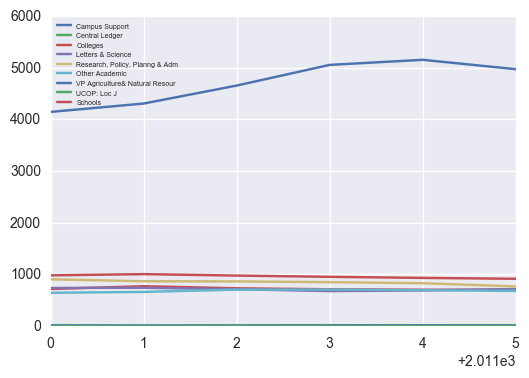

In [5]:
l2_campus_support = control_unit_table[control_unit_table["Control Units"] =="Campus Support"]
l2_central_ledger = control_unit_table[control_unit_table["Control Units"] == "Central Ledger"]
l2_colleges = control_unit_table[control_unit_table["Control Units"] == "Colleges"]
l2_lands = control_unit_table[control_unit_table["Control Units"] == "Letters & Science"]
l2_rppa = control_unit_table[control_unit_table["Control Units"] == "Research, Policy, Planng & Adm"]
l2_oa = control_unit_table[control_unit_table["Control Units"] == "Other Academic"]
l2_vpanr = control_unit_table[control_unit_table["Control Units"] == "VP Agriculture& Natural Resour"]
l2_ucop = control_unit_table[control_unit_table["Control Units"] == "UCOP: Loc J"]
l2_schools = control_unit_table[control_unit_table["Control Units"] == "Schools"]
#plot time series data for different L2 control units data in number of staff from 2011 to 2016
for i in [l2_campus_support,l2_central_ledger,l2_colleges,l2_lands,l2_rppa, l2_oa, l2_vpanr, l2_ucop, l2_schools]:
    plt.plot(i["Year"], i["Head Count"])
plt.legend(["Campus Support", "Central Ledger","Colleges","Letters & Science", "Research, Policy, Planng & Adm",
           "Other Academic", "VP Agriculture& Natural Resour", "UCOP: Loc J", "Schools"], loc='upper left', prop={'size':5})
#This is nine departments in one time series graph

We can see the change scale of "Campus support" category is far larger than the rest(1000 scale vs 100 scale). In order to visualize the rest of the control units besides "Campus support", we create a different visualization.

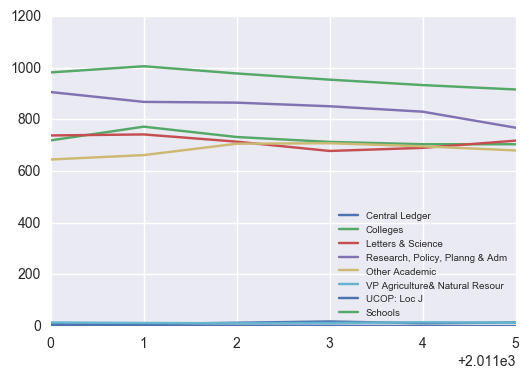

In [6]:
labels = ["2011", "2012", "2013", "2014", "2015", "2016"]
for i in [l2_central_ledger,l2_colleges,l2_lands,l2_rppa, l2_oa, l2_vpanr, l2_ucop, l2_schools]:
    plt.plot(i["Year"], i["Head Count"])
plt.legend(["Central Ledger","Colleges","Letters & Science", "Research, Policy, Planng & Adm",
           "Other Academic", "VP Agriculture& Natural Resour", "UCOP: Loc J", "Schools"], loc='lower right', prop={'size':7})

We don't want to keep any student data and just want to focus on Berkeley staff. From the original exploration for the sample data we discovered categories that point to students. So we exclude them and keep them in a table. Students data itself called "students" and staff called "nonstudents"

In [7]:
students = sample_table[sample_table['Job Code Desc'].apply(lambda x:
x in ["Appointed Official,Stu Actvs","STDT 1","STDT 2", "STDT 3", "STDT 4", "Student Volunteer"])]
students

,Empl Id,Empl Rcd No,Appt Type Desc,Empl Status,Effective Date,Action Reason Desc,Job Code,Job Code Desc,Org Node Code,Org Node Descr,Control Unit Code,Control Unit Desc,Division Code,Division Desc,Hire Dt,Annual Pay Rt,Fte,Ethnic Group Desc,Sex Cd,Birthdate
2144,719,0,3 - Limited,T,08/30/11 12:00 AM,TER - Limited Employee,4919U,STDT 4,SLING,Linguistics,COLLS,Letters & Science,LS1SS,L&S Social Sciences,07/18/2000,"$43,848.00",0.25,Wh,M,12/23/1975
2734,13148,0,3 - Limited,T,05/13/11 12:00 AM,TER - Limited Employee,4329U,"Appointed Official,Stu Actvs",UPCAR,Career Center,CAMSU,Campus Support,VCUGA,Student Affairs,10/23/2000,"$18,000.00",0.00,As,F,05/30/1977
3220,5013,1,1 - Contract,T,06/15/12 12:00 AM,TER - End Additional Job,4329U,"Appointed Official,Stu Actvs",IQBBB,QB3 Institute,VCRES,"Research, Policy, Planng & Adm",VCRAC,Academic Research Units,08/01/2004,"$24,000.00",0.00,Hisp,M,04/11/1980
3717,3273,1,3 - Limited,T,03/31/11 12:00 AM,TER - End Additional Job,4919U,STDT 4,SPOLS,Political Science,COLLS,Letters & Science,LS1SS,L&S Social Sciences,05/31/2005,"$41,823.00",0.24,Wh,M,11/05/1980
3790,11313,0,3 - Limited,T,08/01/11 12:00 AM,TER - Inactive-12 consecutive months,4329U,"Appointed Official,Stu Actvs",EBEDP,Professional Development Prog,CAMSU,Campus Support,VCEI3,Equity & Inclusion Div,07/29/2004,"$36,000.00",0.00,Hisp,M,10/22/1984
4293,2061,0,3 - Limited,T,06/28/11 12:00 AM,TER - Appt/Contract Expired,4329U,"Appointed Official,Stu Actvs",UGARS,Admissions & Rel with Schs,CAMSU,Campus Support,VCUGA,Student Affairs,10/05/2005,$0.00,0.00,Hisp,F,07/05/1987
4752,10316,0,3 - Limited,T,04/15/13 12:00 AM,TER - Appt/Contract Expired,4919U,STDT 4,MCECO,ESPM ECOSYSTEM SCIENCES DIV,COLLE,Colleges,CO1NR,College of Natural Resources,08/01/2006,"$48,128.00",0.50,Wh,M,01/12/1983
5110,10546,0,3 - Limited,T,08/04/15 12:00 AM,TER - Appt/Contract Expired,4329U,"Appointed Official,Stu Actvs",FTRAN,Parking & Transportation,CAMSU,Campus Support,VCCPD,Real Estate,01/10/2007,$132.00,0.20,Hisp,M,09/10/1985
5131,230,0,3 - Limited,T,05/31/13 12:00 AM,TER - Limited Employee,4919U,STDT 4,SLING,Linguistics,COLLS,Letters & Science,LS1SS,L&S Social Sciences,01/01/2007,"$41,760.00",0.25,Wh,F,11/21/1979
5518,974,0,3 - Limited,T,07/01/15 12:00 AM,TER - Inactive-12 consecutive months,4329U,"Appointed Official,Stu Actvs",FOREC,Recreational Sports,CAMSU,Campus Support,VCBAS,Administration & Finance,06/22/2007,$0.00,0.00,Wh,F,10/27/1991


Since the data that Indu gives us have different headers, we change the headers to the original headers from the original sample.

In [8]:
sample_table = sample_table.rename(columns = {'Empl Id':'Empl_Id', 'Empl Rcd No': 'Empl_Rcd_No','Empl Status': 'Empl_Status','Control Unit':'Control_Unit', 'Appt Type Desc':'Appt_Type_Header', 'Effective Date': 'Effective_Date'})
nonfaculty = sample_table[sample_table['Appt_Type_Header'].apply(lambda x: x.startswith(('X','Y','Z')) != True)]

We have made the inference that "End Additional Job" in  Action Reason Desc was a redundancy, so we drop all of them. But we still want to remain the original table for extra analysis for that categories. So we rename the data frame after we drop "End Additional Job" and call it "nonstudents1"

In [9]:
nonstudents = nonfaculty[nonfaculty['Job Code Desc'].apply(lambda x:
x not in ["Appointed Official,Stu Actvs","STDT 1","STDT 2", "STDT 3", "STDT 4", "Student Volunteer"])]
nonstudents1 = nonstudents[nonstudents["Action Reason Desc"]!= "TER - End Additional Job"]
nonstudents1

,Empl_Id,Empl_Rcd_No,Appt_Type_Header,Empl_Status,Effective_Date,Action Reason Desc,Job Code,Job Code Desc,Org Node Code,Org Node Descr,Control Unit Code,Control Unit Desc,Division Code,Division Desc,Hire Dt,Annual Pay Rt,Fte,Ethnic Group Desc,Sex Cd,Birthdate
0,2277,0,2 - Regular/Career,T,11/01/16 12:00 AM,TER - Retirement-Voluntary-Staff,0657U,Business Systems Analyst 4,SXSIS,Student Information Systems,CAMSU,Campus Support,VCUGA,Student Affairs,12/13/1993,"$119,833.00",1.00,Wh,F,02/25/1953
1,6403,0,2 - Regular/Career,T,06/27/14 12:00 AM,TER - Retirement-Voluntary-Staff,6759C,Library Asst IV,KPADM,Library Administration,OACAD,Other Academic,UCLIB,UC Library,09/25/1973,"$55,872.00",1.00,As,F,02/12/1949
2,5061,0,2 - Regular/Career,T,06/27/13 12:00 AM,TER - Retirement-Voluntary-Staff,4136U,Recreation Supervisor 1,FOREC,Recreational Sports,CAMSU,Campus Support,VCBAS,Administration & Finance,01/13/1977,"$44,517.00",1.00,As,F,02/01/1956
3,10871,0,2 - Regular/Career,T,06/29/11 12:00 AM,TER - Retirement-Voluntary-Staff,8255C,"Stationary Engineer,Leadworker",UKHDS,Housing & Dining Services,CAMSU,Campus Support,VCUGA,Student Affairs,11/02/1981,"$65,918.00",1.00,As,M,03/15/1948
4,13633,0,6 - Per Diem,D,02/22/11 12:00 AM,TER - Death,0585U,Physician 5,FYUHS,University Health Services,CAMSU,Campus Support,VCBAS,Administration & Finance,11/01/1972,"$146,160.00",0.01,Wh,M,05/08/1932
6,10485,0,2 - Regular/Career,T,06/29/16 12:00 AM,TER - Retirement-Voluntary-Staff,6292U,Events Specialist 3,FNATH,Intercollegiate Athletics,CAMSU,Campus Support,ATHLE,Athletics,01/26/1981,"$49,952.00",1.00,Wh,F,08/19/1957
7,3508,0,2 - Regular/Career,T,08/15/11 12:00 AM,TER - Resign-No Reason Given,8253C,"Engineer, Stationary",FJPPS,Facilities Services,CAMSU,Campus Support,VCCPD,Real Estate,05/14/1981,"$61,387.00",1.00,Wh,M,03/22/1957
8,7695,0,2 - Regular/Career,T,06/27/14 12:00 AM,TER - Retirement-Voluntary-Staff,4510U,Admissions/Recruitment Spec 4,CQADM,SPH Administration,SCHOL,Schools,SC1PH,School of Public Health,09/01/1981,"$58,721.00",1.00,Hisp,F,03/19/1955
9,7695,0,3 - Limited,T,04/30/15 12:00 AM,TER - Appt/Contract Expired,4510U,Admissions/Recruitment Spec 4,CQADM,SPH Administration,SCHOL,Schools,SC1PH,School of Public Health,09/01/1981,"$60,000.00",0.03,Hisp,F,03/19/1955
10,2408,0,2 - Regular/Career,T,02/08/16 12:00 AM,TER - Layoff w/ Rehire/Recall Rights,4723C,_____Assistant II,AZFIN,Shared Services Finance-BusSrv,CAMSU,Campus Support,VCBAS,Administration & Finance,04/09/2001,"$54,100.00",1.00,Wh,F,01/17/1957


We want to be consistent with the time format so that we can calculate the variables later on.

In [10]:
time_format = "%m/%d/%y"
nonstudents1['Effective_Date'] = nonstudents1['Effective_Date'].apply(lambda x: x[:-9])
nonstudents1['Effective_Date'] = pd.to_datetime(nonstudents1['Effective_Date'], 
                                                format = time_format)

C:\Users\cosmo\Anaconda3\envs\ds100\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\cosmo\Anaconda3\envs\ds100\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


We calculate the age here by subtracting effective date with date of birth

In [11]:
#nonstudents1["Effective_Date"] = nonstudents1["Effective_Date"].apply(lambda x: pd.to_datetime(x, format='%d/%m/%Y'))
nonstudents1["Birthdate"] = nonstudents1["Birthdate"].apply(lambda x: pd.Timestamp(x))
nonstudents1["Age"] = (nonstudents1["Effective_Date"] - nonstudents1["Birthdate"]).astype('timedelta64[Y]')
nonstudents1

C:\Users\cosmo\Anaconda3\envs\ds100\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\cosmo\Anaconda3\envs\ds100\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Empl_Id,Empl_Rcd_No,Appt_Type_Header,Empl_Status,Effective_Date,Action Reason Desc,Job Code,Job Code Desc,Org Node Code,Org Node Descr,...,Control Unit Desc,Division Code,Division Desc,Hire Dt,Annual Pay Rt,Fte,Ethnic Group Desc,Sex Cd,Birthdate,Age
0,2277,0,2 - Regular/Career,T,2016-11-01,TER - Retirement-Voluntary-Staff,0657U,Business Systems Analyst 4,SXSIS,Student Information Systems,...,Campus Support,VCUGA,Student Affairs,12/13/1993,"$119,833.00",1.00,Wh,F,1953-02-25,63.0
1,6403,0,2 - Regular/Career,T,2014-06-27,TER - Retirement-Voluntary-Staff,6759C,Library Asst IV,KPADM,Library Administration,...,Other Academic,UCLIB,UC Library,09/25/1973,"$55,872.00",1.00,As,F,1949-02-12,65.0
2,5061,0,2 - Regular/Career,T,2013-06-27,TER - Retirement-Voluntary-Staff,4136U,Recreation Supervisor 1,FOREC,Recreational Sports,...,Campus Support,VCBAS,Administration & Finance,01/13/1977,"$44,517.00",1.00,As,F,1956-02-01,57.0
3,10871,0,2 - Regular/Career,T,2011-06-29,TER - Retirement-Voluntary-Staff,8255C,"Stationary Engineer,Leadworker",UKHDS,Housing & Dining Services,...,Campus Support,VCUGA,Student Affairs,11/02/1981,"$65,918.00",1.00,As,M,1948-03-15,63.0
4,13633,0,6 - Per Diem,D,2011-02-22,TER - Death,0585U,Physician 5,FYUHS,University Health Services,...,Campus Support,VCBAS,Administration & Finance,11/01/1972,"$146,160.00",0.01,Wh,M,1932-05-08,78.0
6,10485,0,2 - Regular/Career,T,2016-06-29,TER - Retirement-Voluntary-Staff,6292U,Events Specialist 3,FNATH,Intercollegiate Athletics,...,Campus Support,ATHLE,Athletics,01/26/1981,"$49,952.00",1.00,Wh,F,1957-08-19,58.0
7,3508,0,2 - Regular/Career,T,2011-08-15,TER - Resign-No Reason Given,8253C,"Engineer, Stationary",FJPPS,Facilities Services,...,Campus Support,VCCPD,Real Estate,05/14/1981,"$61,387.00",1.00,Wh,M,1957-03-22,54.0
8,7695,0,2 - Regular/Career,T,2014-06-27,TER - Retirement-Voluntary-Staff,4510U,Admissions/Recruitment Spec 4,CQADM,SPH Administration,...,Schools,SC1PH,School of Public Health,09/01/1981,"$58,721.00",1.00,Hisp,F,1955-03-19,59.0
9,7695,0,3 - Limited,T,2015-04-30,TER - Appt/Contract Expired,4510U,Admissions/Recruitment Spec 4,CQADM,SPH Administration,...,Schools,SC1PH,School of Public Health,09/01/1981,"$60,000.00",0.03,Hisp,F,1955-03-19,60.0
10,2408,0,2 - Regular/Career,T,2016-02-08,TER - Layoff w/ Rehire/Recall Rights,4723C,_____Assistant II,AZFIN,Shared Services Finance-BusSrv,...,Campus Support,VCBAS,Administration & Finance,04/09/2001,"$54,100.00",1.00,Wh,F,1957-01-17,59.0


We categorize the age into different age groups for simpler analysis and add one column called "Age_group". Since the age above 65 is considered a range for retirement, we make "Above 65" a category.

In [12]:
#check out the Appointment
def age_range(x):
    if x < 20:
        return "Below 20"
    elif x >= 20 and x < 30:
        return "20 - 29"
    elif x >= 30 and x < 40: 
        return "30 - 39"
    elif x >= 40 and x < 50:
        return "40 - 49"
    elif x >= 50 and x < 65:
        return "50 - 64"
    elif x >= 65:
        return  "Above 65"
nonstudents1["Age_group"] = nonstudents1["Age"].apply(lambda x: age_range(x))
nonstudents1

C:\Users\cosmo\Anaconda3\envs\ds100\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Empl_Id,Empl_Rcd_No,Appt_Type_Header,Empl_Status,Effective_Date,Action Reason Desc,Job Code,Job Code Desc,Org Node Code,Org Node Descr,...,Division Code,Division Desc,Hire Dt,Annual Pay Rt,Fte,Ethnic Group Desc,Sex Cd,Birthdate,Age,Age_group
0,2277,0,2 - Regular/Career,T,2016-11-01,TER - Retirement-Voluntary-Staff,0657U,Business Systems Analyst 4,SXSIS,Student Information Systems,...,VCUGA,Student Affairs,12/13/1993,"$119,833.00",1.00,Wh,F,1953-02-25,63.0,50 - 64
1,6403,0,2 - Regular/Career,T,2014-06-27,TER - Retirement-Voluntary-Staff,6759C,Library Asst IV,KPADM,Library Administration,...,UCLIB,UC Library,09/25/1973,"$55,872.00",1.00,As,F,1949-02-12,65.0,Above 65
2,5061,0,2 - Regular/Career,T,2013-06-27,TER - Retirement-Voluntary-Staff,4136U,Recreation Supervisor 1,FOREC,Recreational Sports,...,VCBAS,Administration & Finance,01/13/1977,"$44,517.00",1.00,As,F,1956-02-01,57.0,50 - 64
3,10871,0,2 - Regular/Career,T,2011-06-29,TER - Retirement-Voluntary-Staff,8255C,"Stationary Engineer,Leadworker",UKHDS,Housing & Dining Services,...,VCUGA,Student Affairs,11/02/1981,"$65,918.00",1.00,As,M,1948-03-15,63.0,50 - 64
4,13633,0,6 - Per Diem,D,2011-02-22,TER - Death,0585U,Physician 5,FYUHS,University Health Services,...,VCBAS,Administration & Finance,11/01/1972,"$146,160.00",0.01,Wh,M,1932-05-08,78.0,Above 65
6,10485,0,2 - Regular/Career,T,2016-06-29,TER - Retirement-Voluntary-Staff,6292U,Events Specialist 3,FNATH,Intercollegiate Athletics,...,ATHLE,Athletics,01/26/1981,"$49,952.00",1.00,Wh,F,1957-08-19,58.0,50 - 64
7,3508,0,2 - Regular/Career,T,2011-08-15,TER - Resign-No Reason Given,8253C,"Engineer, Stationary",FJPPS,Facilities Services,...,VCCPD,Real Estate,05/14/1981,"$61,387.00",1.00,Wh,M,1957-03-22,54.0,50 - 64
8,7695,0,2 - Regular/Career,T,2014-06-27,TER - Retirement-Voluntary-Staff,4510U,Admissions/Recruitment Spec 4,CQADM,SPH Administration,...,SC1PH,School of Public Health,09/01/1981,"$58,721.00",1.00,Hisp,F,1955-03-19,59.0,50 - 64
9,7695,0,3 - Limited,T,2015-04-30,TER - Appt/Contract Expired,4510U,Admissions/Recruitment Spec 4,CQADM,SPH Administration,...,SC1PH,School of Public Health,09/01/1981,"$60,000.00",0.03,Hisp,F,1955-03-19,60.0,50 - 64
10,2408,0,2 - Regular/Career,T,2016-02-08,TER - Layoff w/ Rehire/Recall Rights,4723C,_____Assistant II,AZFIN,Shared Services Finance-BusSrv,...,VCBAS,Administration & Finance,04/09/2001,"$54,100.00",1.00,Wh,F,1957-01-17,59.0,50 - 64


Since there are 74 categories for "Action Reason Desc", we want to recategorize the categories for simpler analysis. We have 

In [13]:
#try to put the new category into the dataframe
new_category = ["Retire" , "Fired" , "Contract Expired", "Personal Internal", "Personal External", "Miscellaneous"]
#["Retire", "Miscellaneous", "Contract Expired", "Personal External", " Contract Expired", "Fired", "Fired", "Personal Internal", 
 #"Contract Expired", "Miscellaneous", ""
ar_list = {"TER - Retirement-Voluntary-Staff":1, "TER - Death": 6, "TER - End Additional Job":3, "TER - Resign-No Reason Given":5, 
 "TER - Appt/Contract Expired":3, "TER - Layoff w/ Rehire/Recall Rights":2, "TER - Layoff w/Severance":2,"TER - Dissatisfied With Job":4,
 "TER - Limited Employee":3,"TER - Voluntary Separation Program": 6, "TER - Medical Separation": 5, "TER - Casual/Restricted Appt.":3,
 "TER - Lack of Performance":2,"TER - Other":6,"TER - Misconduct":2, "TER - Layoff-Reduced Sev w/Reh Right":2,
 "TER - Transfer to UCOP-No Brk Serv":4, "TER - Transfer Other UC-No Brk Srv": 4, "TER - Accept Another Job":4,
 "TER - Inactive-12 consecutive months":2, "TER - Health":5, "TER - Family and/or Child Care":5,"TER - Resign-Moved Out Of Area":5,
 "TER - Look for Another Job":4,"TER - Transfer to LBNL-No Brk Serv":4,"TER - Retirement-Faculty":1,"TER - Quit Without Notice":5,
 "TER - Layoff No Sev/No Reh Rights":2,"TER - Never Started Employment":6,"TER - Job Abandonment":5,"TER - Job Layoff w/ Prefer Rehire":2,
 "TER - Job-Layoff w/ No Sev/NoPrefREH":2,"TER - Released During Probation":6,"TER - Job Layoff w/ Severance":2,"TER - Self-Employment":4,
 "TER - Failure to Return from Leave":5,"TER - To Attend School":5,"TER - Job-Layoff w/ Reduced Sev/REH":2,"TER - Grant/Contract Expired":3,
 "TER - Do Not Rehire-EE Agreement":2,"TER - Other Term-Coach PerDiem Mngt":3,"TER - Per Diem Release":3, "TER - Military Service":5,
 "TER - Visa/Work Authorization Expire":5, "TER - No Longer Certified / Licensed":5,"TER - Graduation-No Longer Student":3,
 "TER - Pregnancy-Did not desire Leave":5}
for key in ar_list:
    ar_list[key] = new_category[ar_list[key] - 1]
s = pd.Series(ar_list, name='New Category')
s.index.name = 'Action Reason Desc'
new_category_df = s.reset_index()
new_df = nonstudents1.merge(new_category_df,left_on='Action Reason Desc', right_on='Action Reason Desc')
new_df

,Empl_Id,Empl_Rcd_No,Appt_Type_Header,Empl_Status,Effective_Date,Action Reason Desc,Job Code,Job Code Desc,Org Node Code,Org Node Descr,...,Division Desc,Hire Dt,Annual Pay Rt,Fte,Ethnic Group Desc,Sex Cd,Birthdate,Age,Age_group,New Category
0,2277,0,2 - Regular/Career,T,2016-11-01,TER - Retirement-Voluntary-Staff,0657U,Business Systems Analyst 4,SXSIS,Student Information Systems,...,Student Affairs,12/13/1993,"$119,833.00",1.00,Wh,F,1953-02-25,63.0,50 - 64,Retire
1,6403,0,2 - Regular/Career,T,2014-06-27,TER - Retirement-Voluntary-Staff,6759C,Library Asst IV,KPADM,Library Administration,...,UC Library,09/25/1973,"$55,872.00",1.00,As,F,1949-02-12,65.0,Above 65,Retire
2,5061,0,2 - Regular/Career,T,2013-06-27,TER - Retirement-Voluntary-Staff,4136U,Recreation Supervisor 1,FOREC,Recreational Sports,...,Administration & Finance,01/13/1977,"$44,517.00",1.00,As,F,1956-02-01,57.0,50 - 64,Retire
3,10871,0,2 - Regular/Career,T,2011-06-29,TER - Retirement-Voluntary-Staff,8255C,"Stationary Engineer,Leadworker",UKHDS,Housing & Dining Services,...,Student Affairs,11/02/1981,"$65,918.00",1.00,As,M,1948-03-15,63.0,50 - 64,Retire
4,10485,0,2 - Regular/Career,T,2016-06-29,TER - Retirement-Voluntary-Staff,6292U,Events Specialist 3,FNATH,Intercollegiate Athletics,...,Athletics,01/26/1981,"$49,952.00",1.00,Wh,F,1957-08-19,58.0,50 - 64,Retire
5,7695,0,2 - Regular/Career,T,2014-06-27,TER - Retirement-Voluntary-Staff,4510U,Admissions/Recruitment Spec 4,CQADM,SPH Administration,...,School of Public Health,09/01/1981,"$58,721.00",1.00,Hisp,F,1955-03-19,59.0,50 - 64,Retire
6,13394,0,2 - Regular/Career,T,2015-02-28,TER - Retirement-Voluntary-Staff,0465U,Fundraising Manager 2,QALSD,L&S Deans' Office,...,L&S Core,09/14/1983,"$158,476.00",1.00,Wh,F,1954-07-16,60.0,50 - 64,Retire
7,12528,0,2 - Regular/Career,T,2012-06-28,TER - Retirement-Voluntary-Staff,4575U,Student Services Advisor 3,INCAS,CASMA,...,L&S Arts & Humanities,11/04/1985,"$54,880.00",1.00,Wh,F,1950-02-22,62.0,50 - 64,Retire
8,1065,0,2 - Regular/Career,T,2013-06-27,TER - Retirement-Voluntary-Staff,7122U,Engineering Tech Supr 2,PHYSI,Physics,...,L&S Math & Physical Sci,02/04/1985,"$92,317.00",1.00,Wh,M,1953-04-25,60.0,50 - 64,Retire
9,6095,0,2 - Regular/Career,T,2011-06-29,TER - Retirement-Voluntary-Staff,0548U,Administrative Manager 2,OKLHS,Lawrence Hall of Science,...,Student Affairs,07/12/1976,"$106,252.00",1.00,As,F,1952-12-04,58.0,50 - 64,Retire


We also calculate the working years here. Since there are are significant number of rows which are for limited employees who might be working for less than a year. We separate a category called "1 year or less" and make the rest of the categories.

In [14]:
#working years
new_df["Hire Dt"] = new_df["Hire Dt"].apply(lambda x: pd.Timestamp(x))
new_df["Effective_Date"] = new_df["Effective_Date"].apply(lambda y: pd.Timestamp(y))
new_df["Working Years"] = (new_df["Effective_Date"] - new_df["Hire Dt"]).astype('timedelta64[Y]')
def work_year_range(x):
    if x  <= 1:
        return "1 year or less"
    if x < 5 and x > 1:
        return "1 - 5"
    elif x >= 5 and x <= 10:
        return "5 - 10"
    elif x >= 11 and x <= 20: 
        return "11 - 20"
    elif x >= 21 and x <= 30:
        return "21 - 30"
    elif x >= 31 and x <= 40:
        return "31 - 40"
    elif x >= 41 and x <= 50:
        return "41 - 50"
    elif x >= 50:
        return  "Above 50"
new_df["Working Year Group"] = new_df["Working Years"].apply(lambda x: work_year_range(x))
new_df

,Empl_Id,Empl_Rcd_No,Appt_Type_Header,Empl_Status,Effective_Date,Action Reason Desc,Job Code,Job Code Desc,Org Node Code,Org Node Descr,...,Annual Pay Rt,Fte,Ethnic Group Desc,Sex Cd,Birthdate,Age,Age_group,New Category,Working Years,Working Year Group
0,2277,0,2 - Regular/Career,T,2016-11-01,TER - Retirement-Voluntary-Staff,0657U,Business Systems Analyst 4,SXSIS,Student Information Systems,...,"$119,833.00",1.00,Wh,F,1953-02-25,63.0,50 - 64,Retire,22.0,21 - 30
1,6403,0,2 - Regular/Career,T,2014-06-27,TER - Retirement-Voluntary-Staff,6759C,Library Asst IV,KPADM,Library Administration,...,"$55,872.00",1.00,As,F,1949-02-12,65.0,Above 65,Retire,40.0,31 - 40
2,5061,0,2 - Regular/Career,T,2013-06-27,TER - Retirement-Voluntary-Staff,4136U,Recreation Supervisor 1,FOREC,Recreational Sports,...,"$44,517.00",1.00,As,F,1956-02-01,57.0,50 - 64,Retire,36.0,31 - 40
3,10871,0,2 - Regular/Career,T,2011-06-29,TER - Retirement-Voluntary-Staff,8255C,"Stationary Engineer,Leadworker",UKHDS,Housing & Dining Services,...,"$65,918.00",1.00,As,M,1948-03-15,63.0,50 - 64,Retire,29.0,21 - 30
4,10485,0,2 - Regular/Career,T,2016-06-29,TER - Retirement-Voluntary-Staff,6292U,Events Specialist 3,FNATH,Intercollegiate Athletics,...,"$49,952.00",1.00,Wh,F,1957-08-19,58.0,50 - 64,Retire,35.0,31 - 40
5,7695,0,2 - Regular/Career,T,2014-06-27,TER - Retirement-Voluntary-Staff,4510U,Admissions/Recruitment Spec 4,CQADM,SPH Administration,...,"$58,721.00",1.00,Hisp,F,1955-03-19,59.0,50 - 64,Retire,32.0,31 - 40
6,13394,0,2 - Regular/Career,T,2015-02-28,TER - Retirement-Voluntary-Staff,0465U,Fundraising Manager 2,QALSD,L&S Deans' Office,...,"$158,476.00",1.00,Wh,F,1954-07-16,60.0,50 - 64,Retire,31.0,31 - 40
7,12528,0,2 - Regular/Career,T,2012-06-28,TER - Retirement-Voluntary-Staff,4575U,Student Services Advisor 3,INCAS,CASMA,...,"$54,880.00",1.00,Wh,F,1950-02-22,62.0,50 - 64,Retire,26.0,21 - 30
8,1065,0,2 - Regular/Career,T,2013-06-27,TER - Retirement-Voluntary-Staff,7122U,Engineering Tech Supr 2,PHYSI,Physics,...,"$92,317.00",1.00,Wh,M,1953-04-25,60.0,50 - 64,Retire,28.0,21 - 30
9,6095,0,2 - Regular/Career,T,2011-06-29,TER - Retirement-Voluntary-Staff,0548U,Administrative Manager 2,OKLHS,Lawrence Hall of Science,...,"$106,252.00",1.00,As,F,1952-12-04,58.0,50 - 64,Retire,34.0,31 - 40


We have seen in the dataframe that there are many rows that have the same ids, which means that we have employees who are doing multiple roles or terminated multiple times. In order to calculated how many people on earth are terminated, we might want to remove the duplicates. A good way to think about this is to consider the salary, which we will calculate as the Annual Pay Rate * Fte(Full time equaivalent). We consider the highest salary among the duplicates to be the primary role that an employee has served(in this case, regular/career > contract > limited > Per Diem). We uses this final dataframe final_df for our data visualization process.

In [15]:
#We want to switch the format of "Annual Pay Rt" column for convenient calculation
def money(number):
    number = number.strip('$')
    try:
        [num,dec]=number.rsplit('.')
        dec = int(dec)
        aside = str(dec)
        x = int('1'+'0'*len(aside))
        price = float(dec)/x
        num = num.replace(',','')
        num = int(num)
        price = num + price
    except:
        price = int(number)
    return price
new_df['Annual Pay Rt']  = new_df['Annual Pay Rt'].apply(money)

In [16]:
#get the salary column
new_df['Salary'] = new_df['Annual Pay Rt'] * new_df['Fte']
new_df

,Empl_Id,Empl_Rcd_No,Appt_Type_Header,Empl_Status,Effective_Date,Action Reason Desc,Job Code,Job Code Desc,Org Node Code,Org Node Descr,...,Fte,Ethnic Group Desc,Sex Cd,Birthdate,Age,Age_group,New Category,Working Years,Working Year Group,Salary
0,2277,0,2 - Regular/Career,T,2016-11-01,TER - Retirement-Voluntary-Staff,0657U,Business Systems Analyst 4,SXSIS,Student Information Systems,...,1.00,Wh,F,1953-02-25,63.0,50 - 64,Retire,22.0,21 - 30,119833.00
1,6403,0,2 - Regular/Career,T,2014-06-27,TER - Retirement-Voluntary-Staff,6759C,Library Asst IV,KPADM,Library Administration,...,1.00,As,F,1949-02-12,65.0,Above 65,Retire,40.0,31 - 40,55872.00
2,5061,0,2 - Regular/Career,T,2013-06-27,TER - Retirement-Voluntary-Staff,4136U,Recreation Supervisor 1,FOREC,Recreational Sports,...,1.00,As,F,1956-02-01,57.0,50 - 64,Retire,36.0,31 - 40,44517.00
3,10871,0,2 - Regular/Career,T,2011-06-29,TER - Retirement-Voluntary-Staff,8255C,"Stationary Engineer,Leadworker",UKHDS,Housing & Dining Services,...,1.00,As,M,1948-03-15,63.0,50 - 64,Retire,29.0,21 - 30,65918.00
4,10485,0,2 - Regular/Career,T,2016-06-29,TER - Retirement-Voluntary-Staff,6292U,Events Specialist 3,FNATH,Intercollegiate Athletics,...,1.00,Wh,F,1957-08-19,58.0,50 - 64,Retire,35.0,31 - 40,49952.00
5,7695,0,2 - Regular/Career,T,2014-06-27,TER - Retirement-Voluntary-Staff,4510U,Admissions/Recruitment Spec 4,CQADM,SPH Administration,...,1.00,Hisp,F,1955-03-19,59.0,50 - 64,Retire,32.0,31 - 40,58721.00
6,13394,0,2 - Regular/Career,T,2015-02-28,TER - Retirement-Voluntary-Staff,0465U,Fundraising Manager 2,QALSD,L&S Deans' Office,...,1.00,Wh,F,1954-07-16,60.0,50 - 64,Retire,31.0,31 - 40,158476.00
7,12528,0,2 - Regular/Career,T,2012-06-28,TER - Retirement-Voluntary-Staff,4575U,Student Services Advisor 3,INCAS,CASMA,...,1.00,Wh,F,1950-02-22,62.0,50 - 64,Retire,26.0,21 - 30,54880.00
8,1065,0,2 - Regular/Career,T,2013-06-27,TER - Retirement-Voluntary-Staff,7122U,Engineering Tech Supr 2,PHYSI,Physics,...,1.00,Wh,M,1953-04-25,60.0,50 - 64,Retire,28.0,21 - 30,92317.00
9,6095,0,2 - Regular/Career,T,2011-06-29,TER - Retirement-Voluntary-Staff,0548U,Administrative Manager 2,OKLHS,Lawrence Hall of Science,...,1.00,As,F,1952-12-04,58.0,50 - 64,Retire,34.0,31 - 40,106252.00


In [17]:
# This code can be remained for future examination for whether we have extracted the maximum. I store the maximum salary of eacch employee id 
# in a dictionary called id_dict. You don't need to implement this code unless you want to check whether we have done things correctly.
#id_dict = {}
#ids = []
#current_id = -1
#for i in new_df1.iterrows():
    #current_id = i[1]['Empl_Id']
    #if current_id in ids:
        #if i[1]["Salary"] > id_dict[current_id]:
            #id_dict[current_id] = i[1]["Salary"]
    #else:
        #ids.append(current_id)
        #id_dict[current_id] = i[1]["Salary"]

In [18]:
#One line code for extracting the maximum salary of each employees id.
a = new_df[new_df['Salary'] == new_df.groupby(['Empl_Id'])['Salary'].transform(max)]

In [19]:
#there still seems to be some duplicates because some employee ids have multiple maximums(which is most likely to be limited 
#employees with a salary of 0. In this case we drop the duplicates for employee id and get the final data frame final_df
final_df = a.drop_duplicates("Empl_Id")

In [22]:
final_df.groupby("Working Year Group").count()

,Empl_Id,Empl_Rcd_No,Appt_Type_Header,Empl_Status,Effective_Date,Action Reason Desc,Job Code,Job Code Desc,Org Node Code,Org Node Descr,...,Annual Pay Rt,Fte,Ethnic Group Desc,Sex Cd,Birthdate,Age,Age_group,New Category,Working Years,Salary
Working Year Group,,,,,,,,,,,,,,,,,,,,,
1 - 5,2746,2746,2746,2746,2746,2746,2746,2746,2746,2746,...,2746,2746,2730,2746,2746,2746,2746,2746,2746,2746
1 year or less,5858,5858,5858,5858,5858,5858,5858,5858,5858,5858,...,5858,5858,5790,5857,5858,5858,5858,5858,5858,5858
11 - 20,1213,1213,1213,1213,1213,1213,1213,1213,1213,1213,...,1213,1213,1208,1213,1213,1213,1213,1213,1213,1213
21 - 30,539,539,539,539,539,539,539,539,539,539,...,539,539,538,539,539,539,539,539,539,539
31 - 40,305,305,305,305,305,305,305,305,305,305,...,305,305,305,305,305,305,305,305,305,305
41 - 50,42,42,42,42,42,42,42,42,42,42,...,42,42,42,42,42,42,42,42,42,42
5 - 10,2137,2137,2137,2137,2137,2137,2137,2137,2137,2137,...,2137,2137,2129,2137,2137,2137,2137,2137,2137,2137


In [21]:
final_df.to_csv("final_df.csv")

In [23]:
control_unit_table.to_csv("control_unit_table.csv")